# 군집화의 개념과 비지도 학습

* 군집화 clustering
    - 소속집단의 정보가 없고 모르는 상태에서 비슷한 집단으로 묶은 비지도 학습
    - 입력 데이터를 바탕으로 출력값을 예측하는 목적으로 사용되기 보다는 데이터의 의미를 파악하고 기준을 만드는 목적
    
* 분류와 비교
    - 소속집단에 대한 정보 : 분류(o) 군집화(x)
    - 레이블 유무 : 분류(o) 군집화(x)
    - 종류 : 분류(지도 학습) 군집화(비지도 학습)
    - 공통점 : 데이터를 비슷한 집단으로 묶는 방법

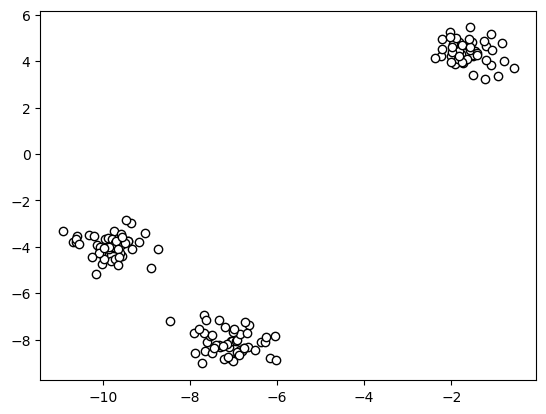

In [2]:
# 군집화 데이터 예시

import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples = 150, n_features = 2, centers = 3, cluster_std = 0.5, shuffle = True, random_state = 1)

plt.figure()

plt.scatter(X[:, 0], X[:, 1], c = 'white', edgecolor = 'black')

plt.show()

# k-평균 알고리즘

* 원리가 단순하고 직관적, 성능이 좋은 군집화 알고리즘
* 사전에 군집의 개수 k값을 지정해야하는 단점
* k-NN 알고리즘과 비교
    - k-NN 알고리즘은 가장 가까운 데이터 n개를 뽑아서 데이터를 분류화하는 알고리즘
    - k-평균 알고리즘은 k-NN과 달리 정답 레이블이 없는 문제
    - 데이터를 몇 개의 묶음, 클러스터로 나눌 것인지 결정 해야함 이것이 k-평균 알고리즘의 k
* 알고리즘
    1. k개의 데이터를 랜덤하게 정하고 그 데이터들을 각 군집의 중심으로 정한다.
    2. 모든 데이터들을 자신과 가까운 중심의 소속으로 군집을 만든다.
    3. 군집별 데이터를 바탕으로 실제 중심을 찾는다.
    4. 실제 중심으로 새롭게 군집을 정한다. 
    5. 안정화 될 때까지 반복한다.
* 중심을 잘 못 찾아가는 경우
    - n_init 인자에 값을 줘서 처음 랜덤하게 중심 데이터 선정을 n번 반복하고 가장 안정된 데이터로
    - 어떤 중심이 가장 안정적일까    
        - 제곱간 오차로 판별
        - 각 군집의 데이터와 중심간의 거리를 제곱해서 더한후 군집간의 차를 구한다.
        - 제곱간 오차가 작은 것이 클러스터의 범위가 다 비슷하다는 의미 = 안정적
        - 한 클러스터가 크고 다른 클러스터가 작은 것은 불안정할 가능성이 높다.
* init인자 default인 k-means++
    - n_init만큼 반복
* tol 인자
    - 허용 오차
    - 크게 주면 학습이 빨리 끝난다.

In [15]:
# k-평균 알고리즘 예제

from sklearn.cluster import KMeans

km = KMeans(n_clusters = 3, init = 'random', max_iter = 300, n_init = 10, random_state = 1) # init : 시작할 때 어떻게 할지, max_iter : 중심 옮기는 최대 반복 횟수, 
                                                                                            # init 디폴트 k-means++이 성능이좋고 안정적이다.

km.fit(X) # cluster는 인자로 y없이 X만 준다.

C:\Users\PC\anaconda3\envs\CW_AI_Academy\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(init='random', n_clusters=3, n_init=10, random_state=1)

In [4]:
p = km.predict(X) 
p

array([2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 1, 2, 0, 2, 1, 1, 1, 0, 2, 0,
       0, 0, 2, 0, 0, 1, 0, 2, 2, 2, 2, 0, 2, 0, 1, 0, 0, 2, 0, 1, 1, 1,
       2, 1, 1, 0, 2, 2, 1, 0, 0, 2, 1, 1, 0, 0, 0, 2, 2, 0, 2, 1, 1, 1,
       1, 1, 2, 0, 1, 1, 1, 0, 1, 0, 2, 1, 2, 1, 1, 2, 1, 2, 2, 1, 1, 1,
       0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 1, 2, 1, 0, 2, 0, 0, 0, 0, 1, 2, 2,
       2, 0, 1, 0, 2, 1, 2, 2, 1, 1, 2, 0, 2, 2, 1, 1, 1, 0, 0, 0, 0, 1,
       2, 0, 0, 2, 1, 0, 0, 0, 2, 2, 2, 1, 0, 0, 1, 2, 1, 1])

In [5]:

center_km = km.cluster_centers_ 
center_km

array([[-1.6114244 ,  4.41658512],
       [-9.8394448 , -3.96236399],
       [-7.0951497 , -8.1114237 ]])

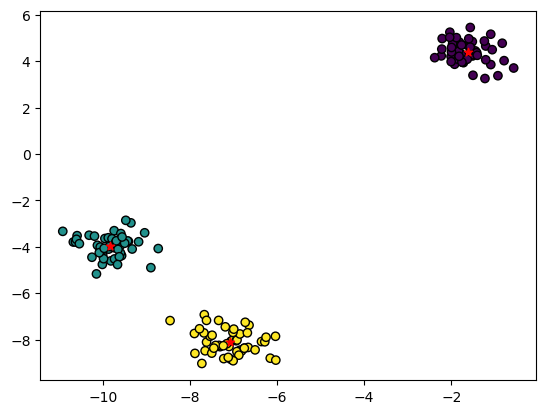

In [6]:
# 클러스터 센터 좌표 확인

center_km = km.cluster_centers_ 

plt.figure()

plt.scatter(X[:, 0], X[:, 1], c = p, edgecolor = 'black')
plt.scatter(center_km[:, 0], center_km[:, 1], c = 'red', marker = '*')

plt.show()

# 클러스터가 잘 되었는지 평가를 위한 지표가 필요하다

* 평가지표 종류

    1. 제곱합오차
        - 클러스터 개수가 많아지면 작아질 수 밖에없어서, 동일한 클러스터 개수일 때 평가를하는 것.
    2. 실루엣 계수
        - k개수가 달라도 서로 비교할때 쓸 수 있다.
        - s(i) = (b(i) - a(i)) / max(a(i), b(i)) 복잡하다. a, b 모두 계수
        - a는 응집도 하나의 클러스터 내에서 얼마나 서로 응집되어 있는지, 군집 내에서 중심과 데이터간의 평균 거리.
            - 클러스터 k 개수가 작을 수록 응집도 a는 작다.
            - 응집도가 높으면 a가 작고 응집도가 낮으면 a가 크다.
        - b는 분리도 하나의 클러스터와 또 다른 클러스타가 얼마나 떨어져 있는지, 멀수록 좋다.
        - 분리도가 크고 응집력이 작은게 좋은 클러스터링 (s(i)가 1에 수렴 할수록 좋은 클러스터링 -1에 수렴할 수록 나쁜 클러스터링)
        - 1 >= s(i) >= -1

In [9]:
# silhouette_samples 샘플하나씩 늘려가면서 계수를 개산 (X를 순서대로 증가)
# silhouette_score 클러스트별 샘플들의 실루엣 계수 평균

from sklearn.metrics import silhouette_samples, silhouette_score
import numpy as np

0.8603266510756534

C:\Users\PC\anaconda3\envs\CW_AI_Academy\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


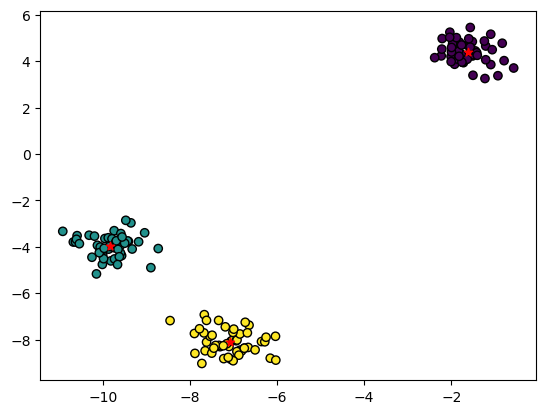

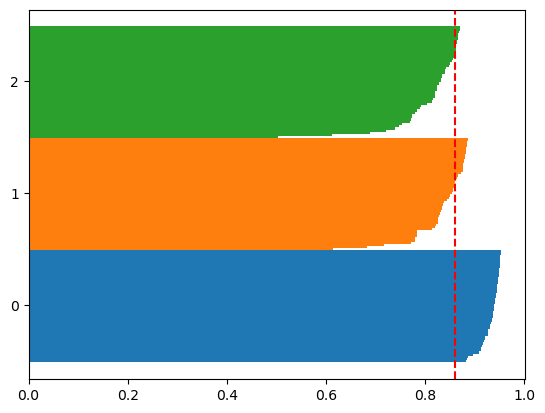

In [12]:
# 모델 생성 / 학습
km = KMeans(n_clusters = 3, init = 'random', max_iter = 300, n_init = 10, random_state = 1) # init : 시작할 때 어떻게 할지, max_iter : 중심 옮기는 최대 반복 횟수

km.fit(X) # cluster는 인자로 y없이 X만 준다.

p = km.predict(X) 

# 모델 군집화 결과 시각화
# 클러스터 센터 좌표 확인
center_km = km.cluster_centers_ 

plt.figure()

plt.scatter(X[:, 0], X[:, 1], c = p, edgecolor = 'black')
plt.scatter(center_km[:, 0], center_km[:, 1], c = 'red', marker = '*')

plt.show()

# 실루엣 그래프 시각화
# 각 실루엣 계수가 어떤 클래스에 의해서 값이 변동되는지 분리해야된다.
sil_samples = silhouette_samples(X, p, metric = 'euclidean') # euclidean 직선거리 
sil_score = silhouette_score(X, p, metric = 'euclidean')
labels = np.unique(p) # 클러스터 k

plt.figure()

y_low = 0
y_high = 0
y_ticks = []

for i in labels :
    isil_samples = sil_samples[p == i]
    isil_samples.sort()
    
    y_high += len(isil_samples)
    
    plt.barh(range(y_low, y_high), isil_samples, height = 1, edgecolor = 'none')
    
    y_ticks.append((y_low + y_high) / 2)
    y_low = y_high

plt.axvline(sil_score, color ='red', linestyle = '--') # 세로 선긋기
plt.yticks(y_ticks, labels)
plt.show()

# y축 클러스트의 샘플 개수, x축 샘플별 실루엣 계수,
# 샘플 중 현재 군집과 가까울수록 위
# 1에 가까울수록 좋은 모델
# 클러스트 별로 두께차이가 나면 좋지않다. (샘플 수가 많이 차이난다는 뜻)

C:\Users\PC\anaconda3\envs\CW_AI_Academy\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


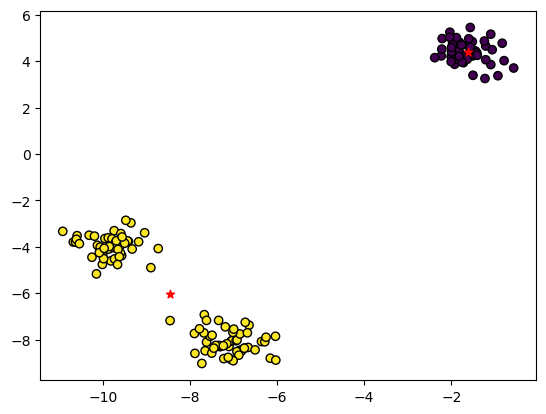

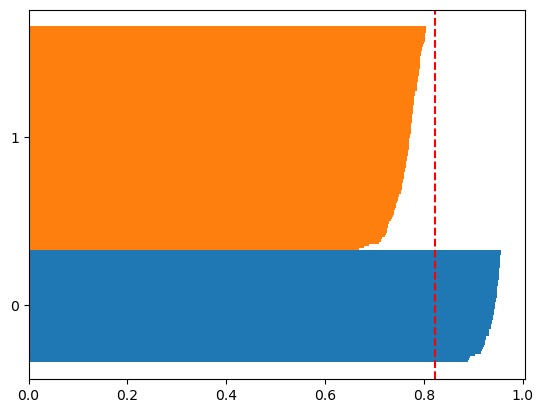

In [13]:
# 모델 생성 / 학습
km = KMeans(n_clusters = 2, init = 'random', max_iter = 300, n_init = 10, random_state = 1) # init : 시작할 때 어떻게 할지, max_iter : 중심 옮기는 최대 반복 횟수

km.fit(X) # cluster는 인자로 y없이 X만 준다.

p = km.predict(X) 

# 모델 군집화 결과 시각화
# 클러스터 센터 좌표 확인
center_km = km.cluster_centers_ 

plt.figure()

plt.scatter(X[:, 0], X[:, 1], c = p, edgecolor = 'black')
plt.scatter(center_km[:, 0], center_km[:, 1], c = 'red', marker = '*')

plt.show()

# 실루엣 그래프 시각화
# 각 실루엣 계수가 어떤 클래스에 의해서 값이 변동되는지 분리해야된다.
sil_samples = silhouette_samples(X, p, metric = 'euclidean') # euclidean 직선거리 
sil_score = silhouette_score(X, p, metric = 'euclidean')
labels = np.unique(p) # 클러스터 k

plt.figure()

y_low = 0
y_high = 0
y_ticks = []

for i in labels :
    isil_samples = sil_samples[p == i]
    isil_samples.sort()
    
    y_high += len(isil_samples)
    
    plt.barh(range(y_low, y_high), isil_samples, height = 1, edgecolor = 'none')
    
    y_ticks.append((y_low + y_high) / 2)
    y_low = y_high

plt.axvline(sil_score, color ='red', linestyle = '--') # 세로 선긋기
plt.yticks(y_ticks, labels)
plt.show()

# y축 클러스트의 샘플 개수, x축 샘플별 실루엣 계수,
# 샘플 중 현재 군집과 가까울수록 위
# 1에 가까울수록 좋은 모델
# 클러스트 별로 두께차이가 나면 좋지않다. (샘플 수가 많이 차이난다는 뜻)

C:\Users\PC\anaconda3\envs\CW_AI_Academy\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


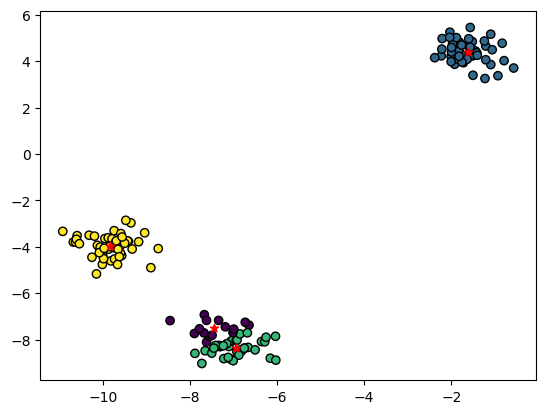

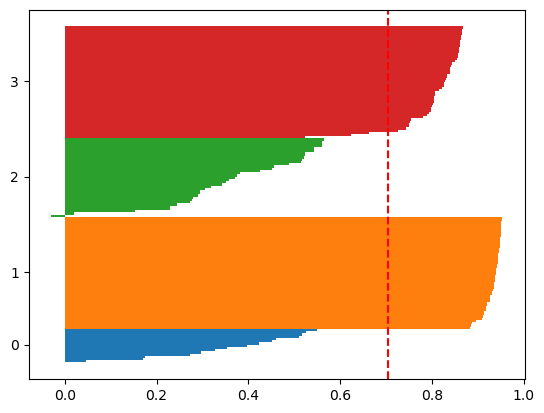

In [14]:
# 모델 생성 / 학습
km = KMeans(n_clusters = 4, init = 'random', max_iter = 300, n_init = 10, random_state = 1) # init : 시작할 때 어떻게 할지, max_iter : 중심 옮기는 최대 반복 횟수

km.fit(X) # cluster는 인자로 y없이 X만 준다.

p = km.predict(X) 

# 모델 군집화 결과 시각화
# 클러스터 센터 좌표 확인
center_km = km.cluster_centers_ 

plt.figure()

plt.scatter(X[:, 0], X[:, 1], c = p, edgecolor = 'black')
plt.scatter(center_km[:, 0], center_km[:, 1], c = 'red', marker = '*')

plt.show()

# 실루엣 그래프 시각화
# 각 실루엣 계수가 어떤 클래스에 의해서 값이 변동되는지 분리해야된다.
sil_samples = silhouette_samples(X, p, metric = 'euclidean') # euclidean 직선거리 
sil_score = silhouette_score(X, p, metric = 'euclidean')
labels = np.unique(p) # 클러스터 k

plt.figure()

y_low = 0
y_high = 0
y_ticks = []

for i in labels :
    isil_samples = sil_samples[p == i]
    isil_samples.sort()
    
    y_high += len(isil_samples)
    
    plt.barh(range(y_low, y_high), isil_samples, height = 1, edgecolor = 'none')
    
    y_ticks.append((y_low + y_high) / 2)
    y_low = y_high

plt.axvline(sil_score, color ='red', linestyle = '--') # 세로 선긋기
plt.yticks(y_ticks, labels)
plt.show()

# y축 클러스트의 샘플 개수, x축 샘플별 실루엣 계수,
# 샘플 중 현재 군집과 가까울수록 위
# 1에 가까울수록 좋은 모델
# 클러스트 별로 두께차이가 나면 좋지않다. (샘플 수가 많이 차이난다는 뜻)
# 실루엣 계수가 - 인 샘플도 있다.

# DBSCAN clustering

* Density Based Spatial Clustering Applications with Noise
* 밀도 기반 클러스터링
* k-means는 이상치(outlier)가 있으면 품질이 떨어진다. 이상치를 찾고 제거하는 과정이 필요하다.
* 특정요소가 클러스트에 존재하려면 해당 클러스트내 다른 요소와 가까이 있어야한다.
* 클러스트 개수 k를 몰라도 된다.
* 직경, 최소요소 값 이용
    - 직경 R 
        - Radius of neighborhood
    - 최소요소 M
        - 직경안에 최소한의 요소 개수
        - Min number of neighborhood
* 데이터세트의 요소 코어, 경계, 이상치
* 현재 데이터만 클러스터링한다. (새로운 값에대한 예측은 없다)
* 알고리즘 
    1. 지정한 직경 R안에 최소요소 M이상의 요소가 존재한다면 클러스터가 된다. 해당 요소는 core point
    2. core point 안에 속한 요소는 border point가 된다.
    3. Core point 안에 속하지 못한 요소는 Noise point가 된다. 
    4. Noise point = Outlier로 클러스터에서 제외된다.
    5. Core point 사이의 거리가 R이하이면 같은 클러스터가 된다.

* 데이터가 적으면 취약, Noise에도 취약

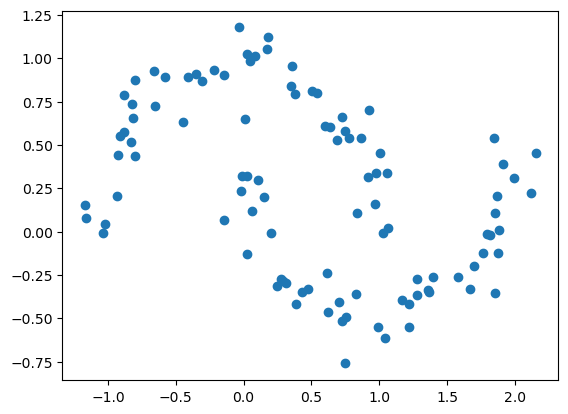

In [17]:
# DBSCAN 실습

from sklearn.datasets import make_moons

X, y = make_moons(n_samples = 100, noise = 0.1, random_state = 1)

plt.figure()
plt.scatter(X[:, 0], X[:, 1])
plt.show()

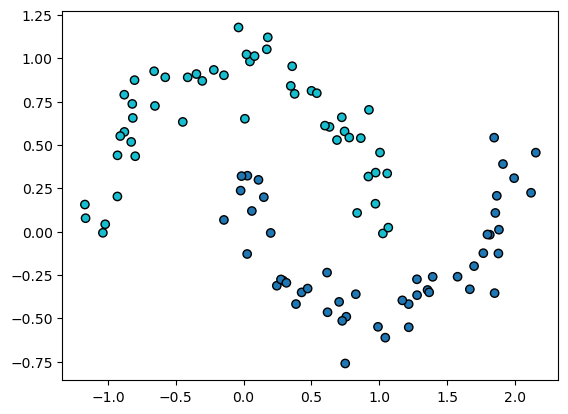

In [28]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps = 0.3, min_samples = 5, metric = 'euclidean') # eps 직경 R, min_samples 최소 요소 M
p = db.fit_predict(X)

plt.figure()
plt.scatter(X[:, 0], X[:, 1], c = p, edgecolor = 'black', cmap = 'tab10')
plt.show()

# 

1. 문제
2. 판별 <데이터에 정답 유무>

3. 정답 데이터가 있다. - 지도 학습 - 회귀, 분류 판별
4. y가 연속적이다 - 회귀 모델
5. y가 클래스이다 - 분류 모델

6. 정답 데이터가 없다. - 비지도 학습 - 데이터의 그룹확인 ?, y
7. 데이터 그룹화 - 군집합
8. - 이상탐지 (ex digi box = one class SVM (OCSVM))
    - 데이터 군집과 빈 공간 사이에 선을 긋는다.

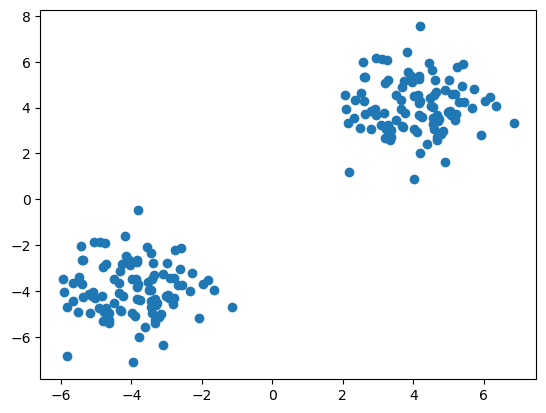

In [31]:
# 이상탐지 실습

X = np.random.randn(100, 2)
X = np.r_[X+4, X-4]

plt.figure()
plt.scatter(X[:, 0], X[:, 1])
plt.show()

In [35]:
from sklearn.svm import OneClassSVM

ocsvm = OneClassSVM(gamma = 0.1, nu = 0.1, kernel = 'rbf') # gamma, nu

ocsvm.fit(X)
# ocsvm.predict()

OneClassSVM(gamma=0.1, nu=0.1)

In [36]:
from matplotlib.colors import ListedColormap

def plot_ocsvm_regions(X, classifier, resolution=0.02): # classifier 분류기, 모델, 퍼셉트론

    # plot the decision surface 잘린 공간 표현
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    #print(xx1)
    #print(xx2)
    #print(np.array([xx1.ravel(), xx2.ravel()]).T)
    
    # 
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4) # 공간 색칠
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

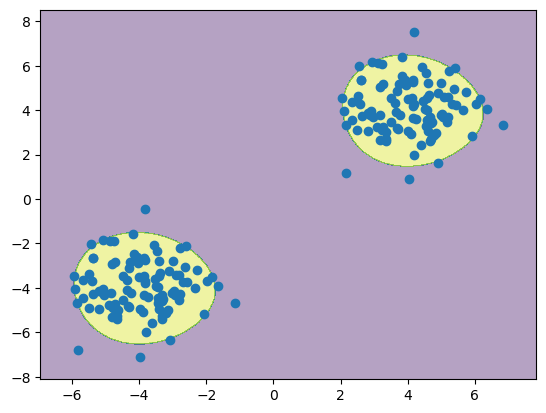

In [37]:
plot_ocsvm_regions(X, ocsvm)

plt.scatter(X[:, 0], X[:, 1])
plt.show()

In [39]:
from matplotlib.colors import ListedColormap

def plot_ocsvm_regions_subplot(X, classifier, ax, resolution=0.02): # classifier 분류기, 모델, 퍼셉트론

    # plot the decision surface 잘린 공간 표현
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    #print(xx1)
    #print(xx2)
    #print(np.array([xx1.ravel(), xx2.ravel()]).T)
    
    # 
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    ax.contourf(xx1, xx2, Z, alpha=0.4) # 공간 색칠
    ax.set_xlim(xx1.min(), xx1.max())
    ax.set_ylim(xx2.min(), xx2.max())

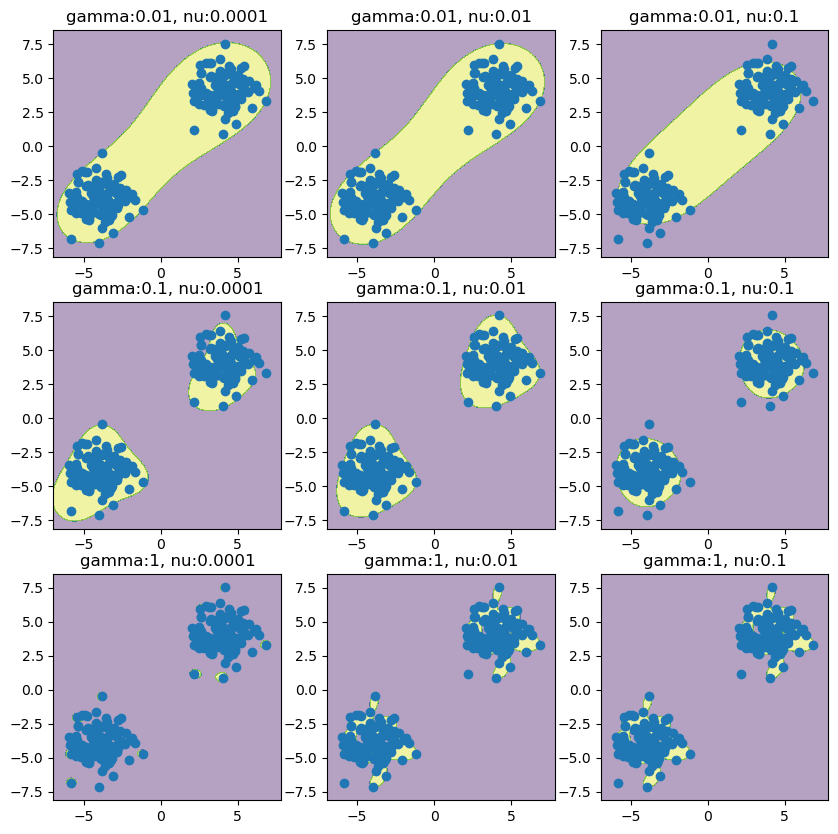

In [43]:
# gamma, nu 파라미터 변경해가며 비교 [0.01, 0.1, 1]

fig, axes = plt.subplots(3, 3, figsize = (10, 10))

for i, gamma in enumerate([0.01, 0.1, 1]) :
    for j, nu in enumerate([0.0001, 0.01, 0.1]) :
        ocsvm = OneClassSVM(gamma = gamma, nu = nu, kernel = 'rbf') # gamma, nu
        ocsvm.fit(X)
        plot_ocsvm_regions_subplot(X, ocsvm, ax = axes[i][j])
        axes[i][j].scatter(X[:, 0], X[:, 1])
        axes[i][j].set_title(f'gamma:{gamma}, nu:{nu}')

plt.show()

# gamma : 얼마나 강하게 규제, 크면 클수록 모델 복잡도가 높아진다. 얼마나 support vector를 허용할 것인가
# 감마가 커지면 과대접합 유발할 수 있다.
# nu : 작으면 포괄적, 크면 제외, 원래 데이터에서 이상치가 얼마나 있다고 볼 것인가, 데이터의 신뢰도
# 기존 데이터가 신뢰도가 높아서 정상 데이터들이라고 판단되면 nu를 작게
# 0.001 0.1% 이상치 
# 적당한 gamma, nu 값을 알 수있다. 차원이 높으면 특징을 2, 3개 뽑아서 그래프로 확인 
# 정답이 없어서 평가가 어렵고 간접적으로나마 그래프를 그려서 눈으로 확인한다.